<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/cnn/nn_architektury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.8946 - loss: 0.3550 - val_accuracy: 0.9786 - val_loss: 0.0683
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9740 - loss: 0.0814
Dokładność na zbiorze testowym: 97.86%

--- Testowanie pojedynczego obrazu ---
Podaj indeks obrazu do przetestowania (0-9999): 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


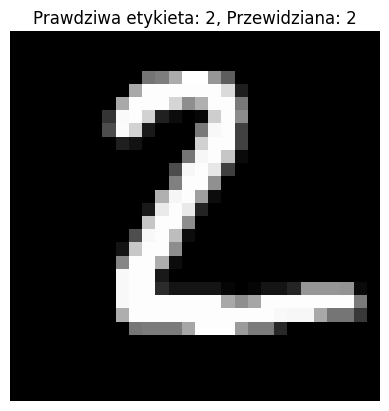

In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie i przygotowanie danych MNIST
def load_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    return X_train, y_train, X_test, y_test

# Tworzenie modelu
def create_model():
    model = Sequential()

    # Wybierz architekturę, odkomentowując odpowiedni fragment:

    # Architektura 1: Jedna warstwa konwolucyjna
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Architektura 2: Dwie warstwy konwolucyjne
    # model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(64, (3, 3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    # Architektura 3: Trzy warstwy konwolucyjne
    # model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(64, (3, 3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(128, (3, 3), activation='relu'))

    # Warstwy gęste i wyjściowa
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Testowanie jednego obrazu
def test_single_image(model, X_test, y_test):
    print("\n--- Testowanie pojedynczego obrazu ---")
    index = int(input("Podaj indeks obrazu do przetestowania (0-9999): "))

    # Pobranie obrazu i prawdziwej etykiety
    image = X_test[index]
    true_label = np.argmax(y_test[index])

    # Przewidywanie etykiety
    prediction = model.predict(image[np.newaxis, ...])
    predicted_label = np.argmax(prediction)

    # Wyświetlenie obrazu i wyników
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Prawdziwa etykieta: {true_label}, Przewidziana: {predicted_label}")
    plt.axis('off')
    plt.show()

# Główna funkcja
def main():
    # Wczytanie danych
    X_train, y_train, X_test, y_test = load_data()

    # Tworzenie i kompilacja modelu
    model = create_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Trenowanie modelu
    model.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test))

    # Ocena modelu
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Dokładność na zbiorze testowym: {accuracy * 100:.2f}%")

    # Testowanie jednego obrazu
    test_single_image(model, X_test, y_test)

# Uruchomienie programu
if __name__ == "__main__":
    main()
